In [2]:
# Import all the functions from DOLFIN (computational backend of the FEniCS project)
from fenics import *
from dolfin import * 
import numpy as np

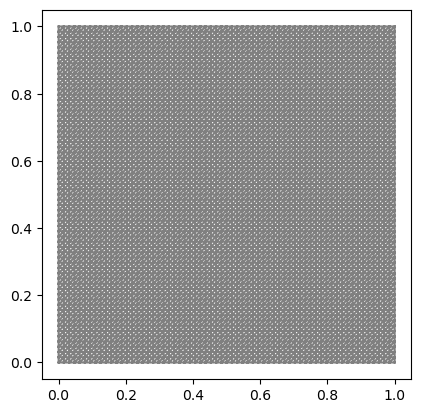

In [3]:
# 20 is number of intervals Omega is divided intoc
mesh = UnitSquareMesh(20, 20)
mesh = RectangleMesh(Point(0.0, 0.0), Point(1.0, 1.0), 64, 64)

plot(mesh)


elem = FiniteElement("Lagrange", mesh.ufl_cell(), 1)
W = FunctionSpace(mesh, elem)

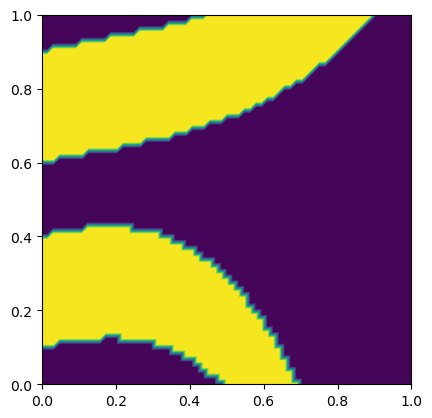

In [16]:
kappa_over_mu = Constant(1.0)  # physical material property

a1 = np.random.uniform(-1,1)
b1 = np.random.normal(0,0.5)
#c1 = np.random.uniform(-1,1)
c1 = np.random.normal(0,1)

a2 = a1
b2 = np.random.normal(0,0.5)
# c2 = np.random.uniform(-1,1)
c2 = np.random.normal(0,1)

P = FunctionSpace(mesh, "Lagrange", 1)
class Kappa_dom(UserExpression):
    def __init__(self, a1, b1, c1, a2, b2, c2, **kwargs):
        super().__init__()
        self.a1 = a1
        self.b1 = b1
        self.c1 = c1
        self.a2 = a2
        self.b2 = b2
        self.c2 = c2

    def eval(self, value, x):
        y1 = self.a1 * x[0] + self.b1 * x[0]**2 + self.c1 * x[0]**3 + 0.1
        y2 = self.a1 * x[0] + self.b1 * x[0]**2 + self.c1 * x[0]**3 + 0.4
        y3 = self.a2 * x[0] + self.b2 * x[0]**2 + self.c2 * x[0]**3 + 0.6
        y4 = self.a2 * x[0] + self.b2 * x[0]**2 + self.c2 * x[0]**3 + 0.9

        if (x[1] > y1 and x[1] < y2) or (x[1] > y3 and x[1] < y4):
            value[0] = 21.2
        else:
            value[0] = 1.0

    def value_shape(self):
        return ()

kappa_init = Kappa_dom(a1, b1, c1, a2, b2, c2, degree=0)
kappa_over_mu = interpolate(kappa_init, P)

plot(kappa_over_mu)


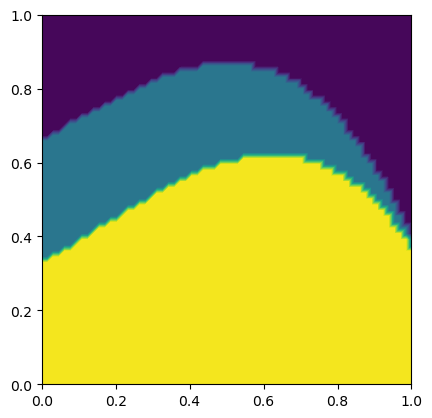

In [25]:
kappa_over_mu = Constant(1.0)  # physical material property

a1 = np.random.uniform(-1,1)
b1 = np.random.uniform(-1,1)
#c1 = np.random.uniform(-1,1)
c1 = np.random.normal(0,1)

a2 = a1
b2 = b1
b2 = np.random.uniform(-1,1)
# c2 = np.random.uniform(-1,1)
c2 = np.random.normal(0,1)

P = FunctionSpace(mesh, "Lagrange", 1)
class Kappa_dom(UserExpression):
    def __init__(self, a1, b1, c1, a2, b2, c2, **kwargs):
        super().__init__()
        self.a1 = a1
        self.b1 = b1
        self.c1 = c1
        self.a2 = a2
        self.b2 = b2
        self.c2 = c2

    def eval(self, value, x):
        y1 = self.a1 * x[0] + self.b1 * x[0]**2 + self.c1 * x[0]**3 + 0.33
        y2 = self.a2 * x[0] + self.b2 * x[0]**2 + self.c2 * x[0]**3 + 0.66

        if x[1] < y1:
            value[0] = 26.2
        elif x[1] < y2:
            value[0] = 11.1
        else:
            value[0] = 1.0

    def value_shape(self):
        return ()

kappa_init = Kappa_dom(a1, b1, c1, a2, b2, c2, degree=0)
kappa_over_mu = interpolate(kappa_init, P)

plot(kappa_over_mu)

In [101]:
phi = Constant(0.1)  # porosity, ranging from 0 to 1
S = Constant(0.0)  # source term
v = TestFunction(W)
p = TrialFunction(W)

In [102]:
value_left = Constant(1.0)
value_right = Constant(0.0)

# test with differente boundary conditions...
# Imposing Dirichlet BC to the left boundary node
bc_l = DirichletBC(W, value_left, "on_boundary && near(x[1], 1)")
# Imposing Dirichlet BC to the right boundary node
bc_r = DirichletBC(W, value_right, "on_boundary && near(x[1], 0)")
bcs = [bc_l, bc_r]   # list of boundary conditions to apply to the problem

Solving linear variational problem.


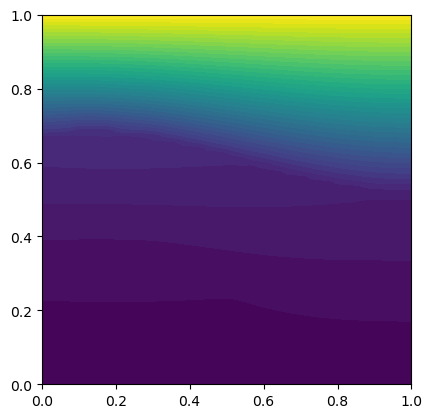

In [103]:
F = kappa_over_mu * dot(grad(p), grad(v)) * dx - S * \
    v * dx  # residual form of our equation
a, L = system(F)
ph = Function(W)  # place to store the solution
solve(a == L, ph, bcs)
plot(ph)